# Final Project Task 2 - Census EDA

#### Student: Iacob Mihai

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

##### 1. Target distribution

In [2]:
# Reading the data
import pandas as pd

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

df = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)

In [3]:
# Making sure that the target is numeric
hours = pd.to_numeric(df["hours-per-week"], errors="coerce")

In [4]:
# Basic descriptive statistics
print("Basic descriptive stats for hours-per-week:")
print(hours.describe())

print("\nSkewness:", hours.skew())

Basic descriptive stats for hours-per-week:
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

Skewness: 0.227642536804501


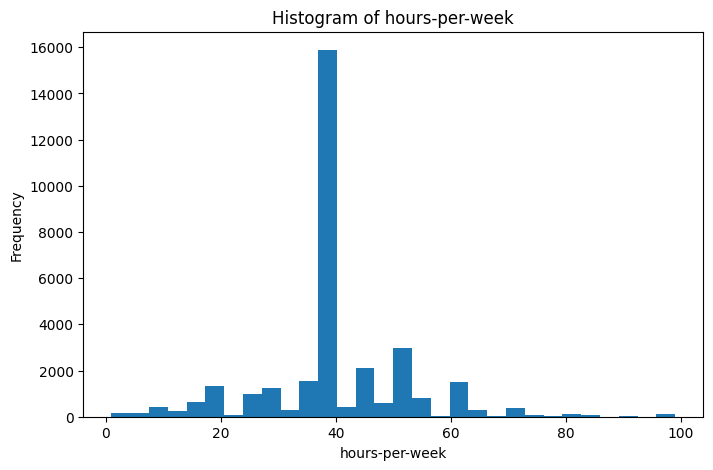

In [5]:
# Histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(hours.dropna(), bins=30)
plt.title("Histogram of hours-per-week")
plt.xlabel("hours-per-week")
plt.ylabel("Frequency")
plt.show()

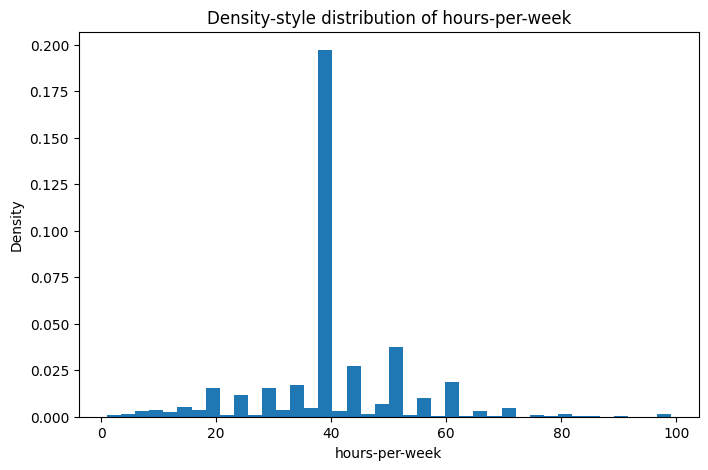

In [6]:
# Density plot
plt.figure(figsize=(8,5))
plt.hist(hours.dropna(), bins=40, density=True)
plt.title("Density-style distribution of hours-per-week")
plt.xlabel("hours-per-week")
plt.ylabel("Density")
plt.show()

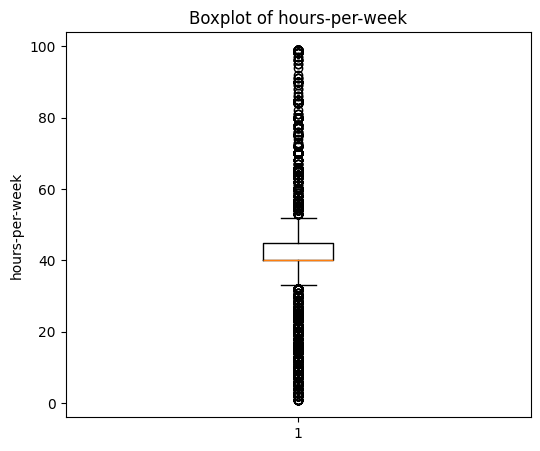

In [7]:
# Boxplot
plt.figure(figsize=(6,5))
plt.boxplot(hours.dropna(), vert=True, showfliers=True)
plt.title("Boxplot of hours-per-week")
plt.ylabel("hours-per-week")
plt.show()

In [8]:
# IQR outlier detection
q1 = hours.quantile(0.25)
q3 = hours.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = hours[(hours < lower) | (hours > upper)]

print(f"\nIQR lower bound: {lower}")
print(f"IQR upper bound: {upper}")
print(f"Number of outliers: {outliers.count()}")
print(f"Percentage of outliers: {outliers.count()/hours.count()*100:.2f}%")


IQR lower bound: 32.5
IQR upper bound: 52.5
Number of outliers: 9008
Percentage of outliers: 27.66%


Distribuția variabilei hours-per-week este concentrată în jurul valorii de 40 de ore, ceea ce indică existența unei norme clare de muncă full-time, cel mai probabil legată de aranjamente contractuale standard. În afara acestui vârf, valorile sunt mult dispersate și apar cu frecvențe considerabil mai mici.

Graficul de tip density confirmă concentrarea ridicată, evidențiind o distribuție neregulată, cu o acumulare masivă la 40 de ore și câteva aglomerări secundare în jurul valorilor de 50–60 de ore, asociate probabil muncii suplimentare. Distribuția nu este una normală.

Boxplot-ul evidențiază faptul că mediana se află foarte aproape de 40 de ore.Intervalul interquartilic este relativ îngust, ceea ce sugerează că majoritatea observațiilor se încadrează într-un interval restrâns în jurul normei full-time. Totodată, observăm un număr semnificativ de outliers, atât la limita inferioară, aproape de 0 ore, cât și la limita superioară, care ajunge până la aproximativ 100 de ore pe săptămână. Asta indică o distribuție asimetrică, puțin skewed spre dreapta, determinată de un număr redus de persoane cu un volum foarte ridicat de muncă. 

##### 2. Descriptive statistics

In [9]:

numeric_df = df.select_dtypes(include="number")
numeric_df_no_target = numeric_df.drop(columns=["hours-per-week"])

desc_no_target = pd.DataFrame({
    "count": numeric_df_no_target.count(),
    "mean": numeric_df_no_target.mean(),
    "median": numeric_df_no_target.median(),
    "std": numeric_df_no_target.std(),
    "min": numeric_df_no_target.min(),
    "max": numeric_df_no_target.max()
})

print(desc_no_target)

               count           mean    median            std    min      max
age            32561      38.581647      37.0      13.640433     17       90
fnlwgt         32561  189778.366512  178356.0  105549.977697  12285  1484705
education-num  32561      10.080679      10.0       2.572720      1       16
capital-gain   32561    1077.648844       0.0    7385.292085      0    99999
capital-loss   32561      87.303830       0.0     402.960219      0     4356


Vârsta are o medie de aproximativ 38,6 ani și mediana de 37. Abaterea standard de 13,6 ani indică o variație considerabilă între persoane, iar intervalul larg 17–90 sugerează prezența atât a tinerilor aflați la început de carieră, cât și a unor persoane foarte în vârstă încă active.

La nivelul educației, media și mediana coincid cu valorea 10, ceea ce indică o distribuție simetrică a anilor de educație. Abaterea standard mică (2,57) arată că majoritatea persoanelor se concentrează într-un interval educațional fără extreme.

În schimb, capital-gain și capital-loss sunt puternic asimetrice. Mediana este 0 în ambele cazuri, în timp ce media este pozitivă, iar abaterile standard sunt foarte mari. Astfel, în majoritatea cazurilor, persoanele nu au câștiguri sau pierderi de capital. În același timp există un număr mic de cazuri cu valori foarte ridicate care trag media în sus.

##### 3. Dealing with missing values

In [10]:
import numpy as np

df = df.replace("?", np.nan)

# Missing values (absolute and relative)
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100

# Missing values report
missing_report = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent
})

missing_report = missing_report.sort_values("missing_count", ascending=False)

print(missing_report)


                missing_count  missing_percent
occupation               1843         5.660146
workclass                1836         5.638647
native-country            583         1.790486
fnlwgt                      0         0.000000
education                   0         0.000000
education-num               0         0.000000
age                         0         0.000000
marital-status              0         0.000000
relationship                0         0.000000
sex                         0         0.000000
race                        0         0.000000
capital-gain                0         0.000000
capital-loss                0         0.000000
hours-per-week              0         0.000000
income                      0         0.000000


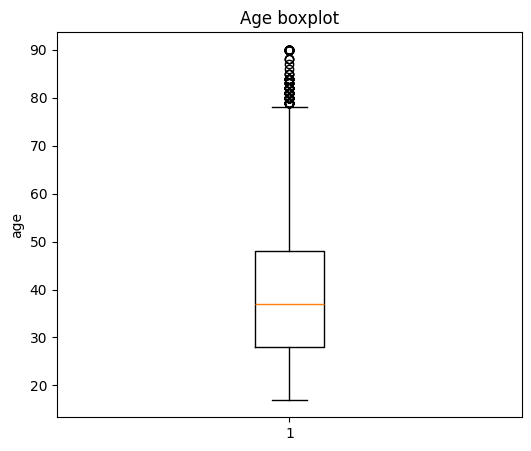

IQR lower limit: -2.0
IQR upper limit: 78.0
Outliers: 143
Outlier percentage: 0.44%


In [11]:
age = pd.to_numeric(df["age"], errors="coerce")

# Boxplot
plt.figure(figsize=(6,5))
plt.boxplot(age.dropna(), vert=True, showfliers=True)
plt.title("Age boxplot")
plt.ylabel("age")
plt.show()

# IQR outlier detection
q1 = age.quantile(0.25)
q3 = age.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = age[(age < lower) | (age > upper)]

print(f"IQR lower limit: {lower}")
print(f"IQR upper limit: {upper}")
print(f"Outliers: {outliers.count()}")
print(f"Outlier percentage: {outliers.count()/age.count()*100:.2f}%")

##### 4. The distribution and descriptives of other numerical variables

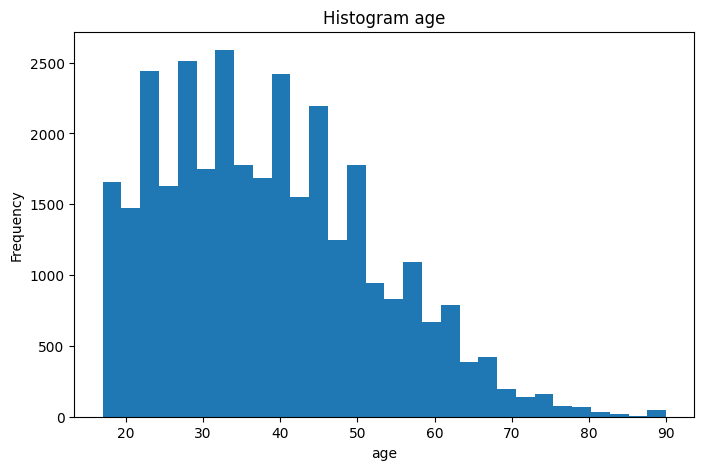

age -> skewness: 0.5587433694130484
----------------------------------------


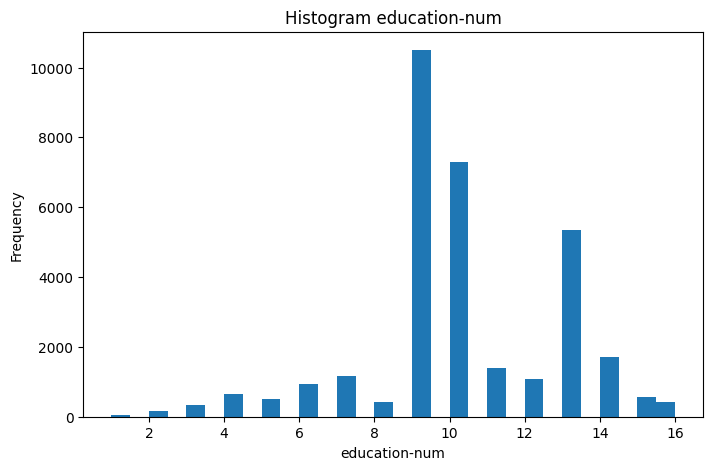

education-num -> skewness: -0.3116758679102297
----------------------------------------


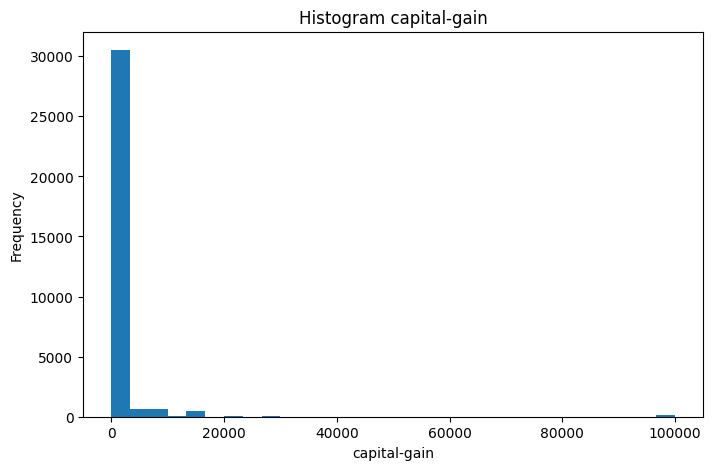

capital-gain -> skewness: 11.953847687699804
----------------------------------------


In [12]:
cols = ["age", "education-num", "capital-gain"]

for col in cols:
    x = pd.to_numeric(df[col], errors="coerce").dropna()
    
    plt.figure(figsize=(8,5))
    plt.hist(x, bins=30)
    plt.title(f"Histogram {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    
    print(f"{col} -> skewness:", x.skew())
    print("-"*40)

Vărsta are o distribuție largă, concentrată în zona vârstei active (aprox. 25–50 ani) și prezintă skewness spre dreapta, cu o coadă către vârste înaintate.

Educația este o variabilă discretă, multimodală, cu acumulări puternice în câteva valori dominante (în jur de 9–10 și 13–14). Distribuția nu este continuă și indică concentrare în niveluri educaționale tipice, cu puține observații la extreme.

Câștigul de capital este puternic skewed spre dreapta, cu o masă foarte mare de zerouri și o coadă lungă formată din puține valori mari. Variabila este puternic zero-inflated.

##### 5. Categorical barplots

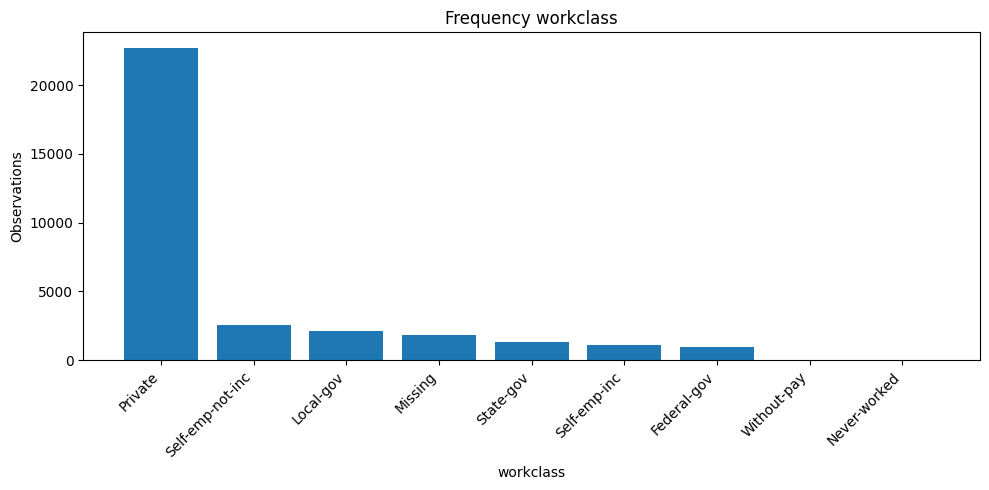

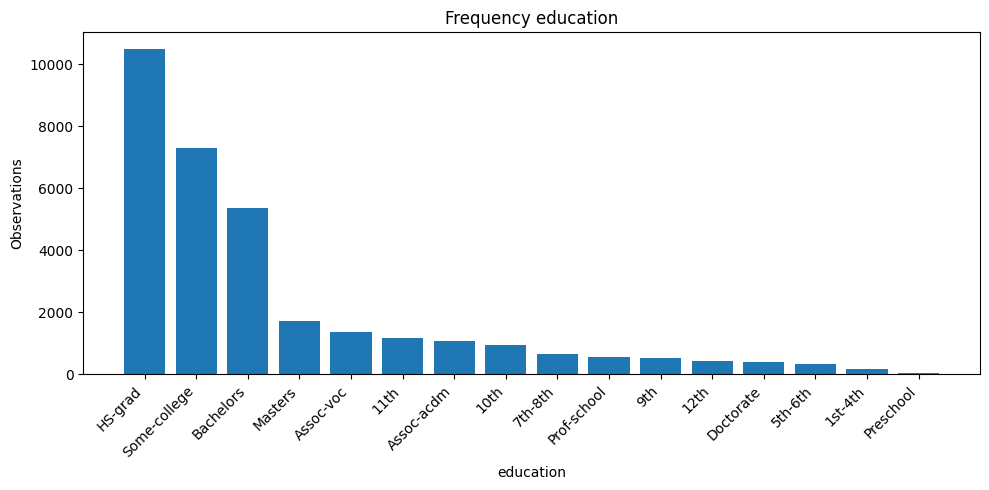

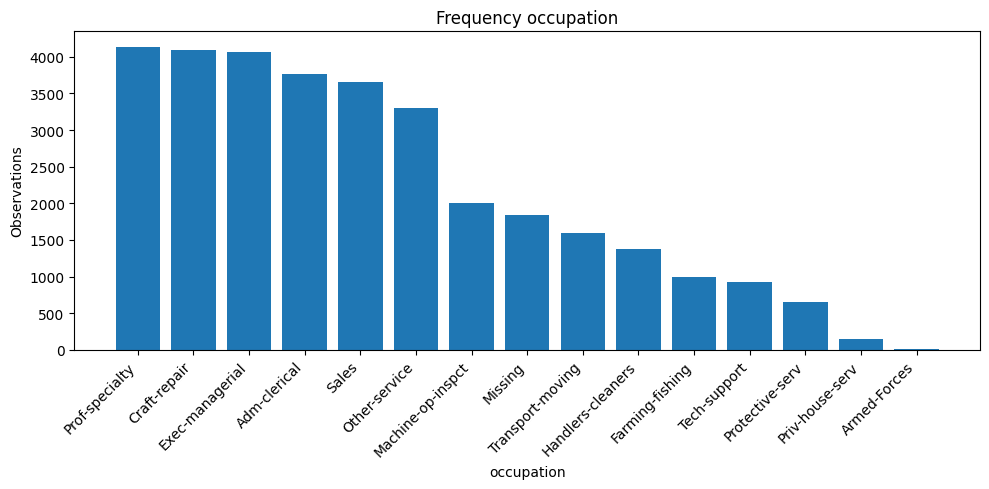

In [15]:
cols = ["workclass", "education", "occupation"]

for col in cols:
    series = df[col].fillna("Missing").astype(str)
    counts = series.value_counts()

    plt.figure(figsize=(10,5))
    plt.bar(range(len(counts)), counts.values)
    plt.xticks(range(len(counts)), counts.index, rotation=45, ha="right")
    plt.title(f"Frequency {col}")
    plt.xlabel(col)
    plt.ylabel("Observations")
    plt.tight_layout()
    plt.show()


Variabila workclass este puternic dezechilibrată, fiind dominată de categoria Private. Celelalte categorii au frecvențe mult mai mici, iar prezența vizibilă a valorilor „Missing” indică non-răspunsuri care trebuie tratate. Categoriile Without-pay și Never-worked sunt marginale.

Distribuția educației este concentrată în câteva niveluri dominante (HS-grad, Some-college, Bachelors), în timp ce nivelurile foarte joase și foarte înalte sunt rar reprezentate. Variabila este ordonată și reflectă o structură educațională puternic ierarhizată.

La nivelul ocupației, distribuția este dispersată, cu mai multe categorii având frecvențe comparabile, dar și cu ocupații foarte rare. Existența unei categorii „Missing” sugerează necesitatea tratării specifice a non-răspunsurilor și, eventual, agregarea categoriilor rare.

##### 6. Working hours per week correlation matrix

Correlations:
hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
Name: hours-per-week, dtype: float64


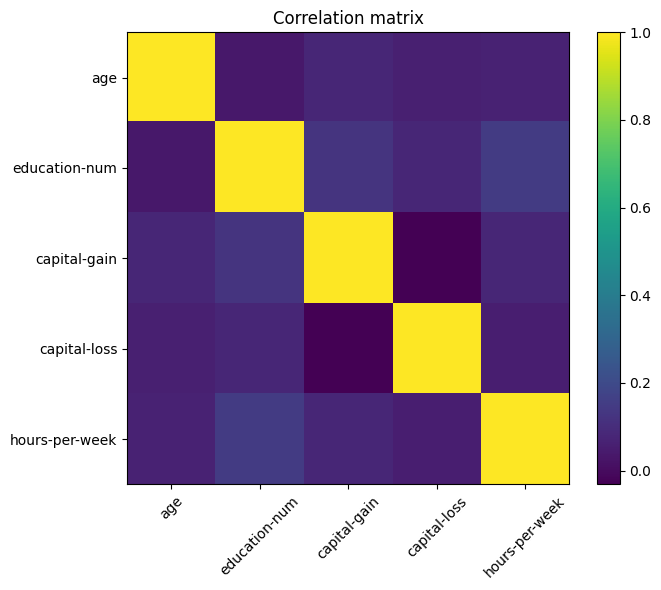

In [16]:
num_cols = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
num_df = df[num_cols].apply(pd.to_numeric, errors="coerce")

corr = num_df.corr()

print("Correlations:")
print(corr["hours-per-week"].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(7,6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

##### 7. Hours per week and education scatter plot

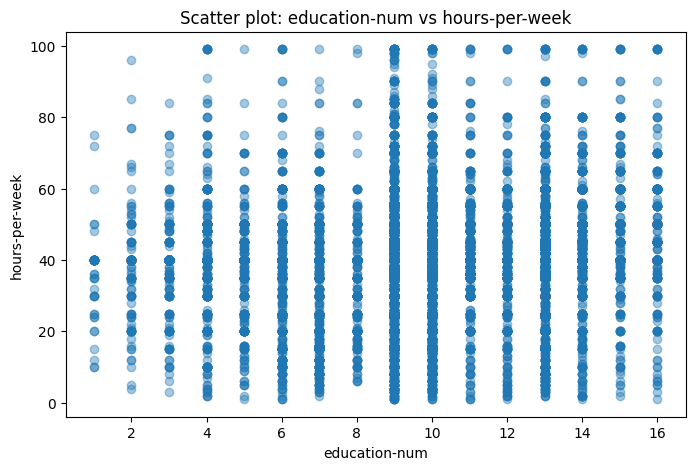

In [20]:
# Pornind de la heatmap-ul anterior, desi corelatia e relativ slaba, cea mai puternica 
# corelata variabila cu hours per week este variabila education. 

x = pd.to_numeric(df["education-num"], errors="coerce")
y = pd.to_numeric(df["hours-per-week"], errors="coerce")

mask = x.notna() & y.notna()

plt.figure(figsize=(8,5))
plt.scatter(x[mask], y[mask], alpha=0.4)
plt.xlabel("education-num")
plt.ylabel("hours-per-week")
plt.title("Scatter plot: education-num vs hours-per-week")
plt.show()

Scatter plot-ul dintre educație și hours-per-week prezintă un tipar discret, determinat de natura ambelor variabile. Educația este o variabilă ordinală cu un număr limitat de valori întregi, ceea ce generează alinierea observațiilor în coloane verticale. Variabila hours-per-week este tot discretă și caracterizată de acumulări puternice la valori standard , ceea ce produce benzi orizontale.

Din punct de vedere relațional, se observă o asociere pozitivă slabă între nivelul de educație și numărul de ore lucrate, în sensul în care nivelurile mai ridicate de educație sunt asociate cu o ușoară extindere a distribuției către valori mai mari ale hours-per-week. Totuși, dispersia rămâne ridicată pentru toate nivelurile educaționale. Mai mult, lipsa unui trend liniar clar indică faptul că relația este indirectă și probabil mediată de factori ocupaționali și instituționali. 

##### 8. Hours per week with the categorical variables boxplot

C:\Users\mihai\AppData\Local\Temp\ipykernel_16508\4039084481.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include="object").columns.tolist()


<Figure size 1200x500 with 0 Axes>

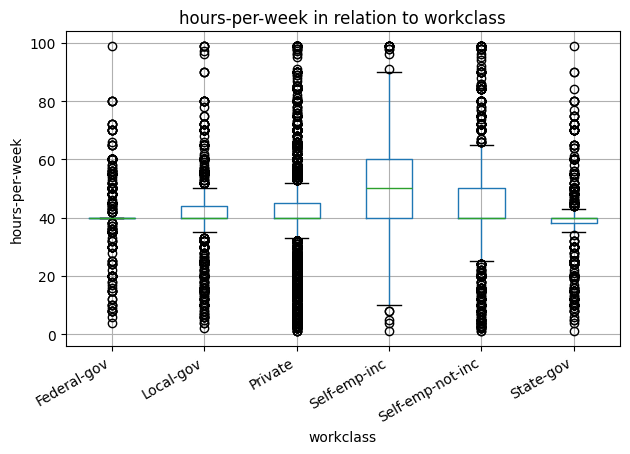

<Figure size 1200x500 with 0 Axes>

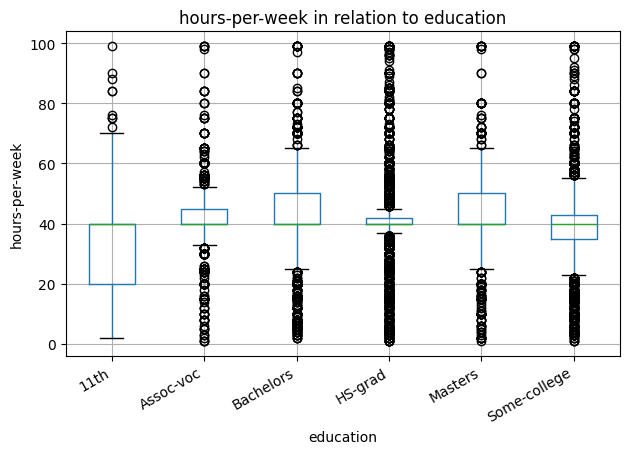

<Figure size 1200x500 with 0 Axes>

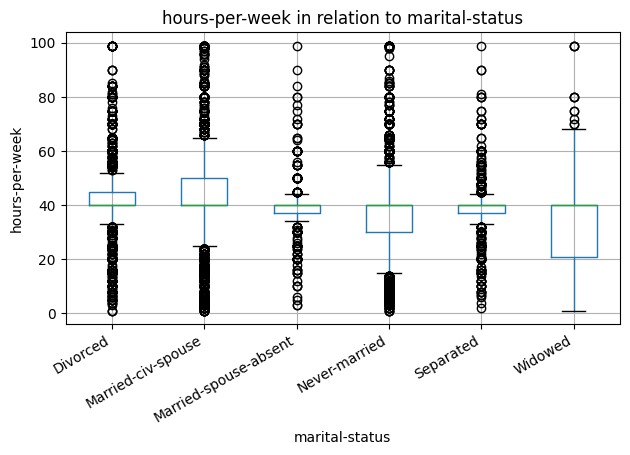

<Figure size 1200x500 with 0 Axes>

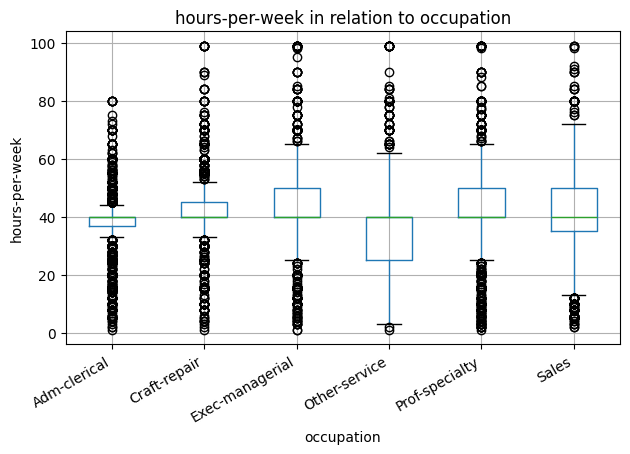

<Figure size 1200x500 with 0 Axes>

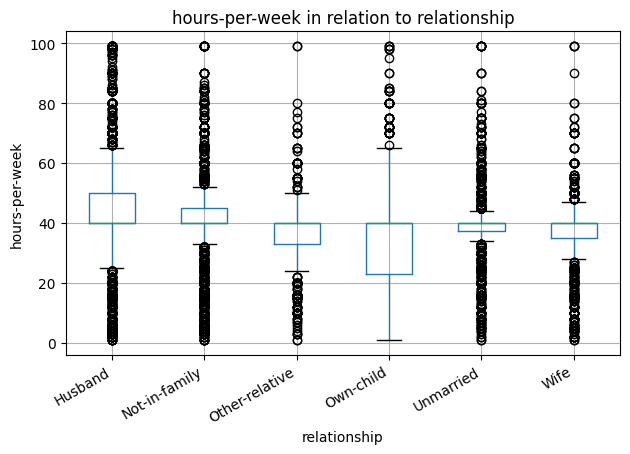

<Figure size 1200x500 with 0 Axes>

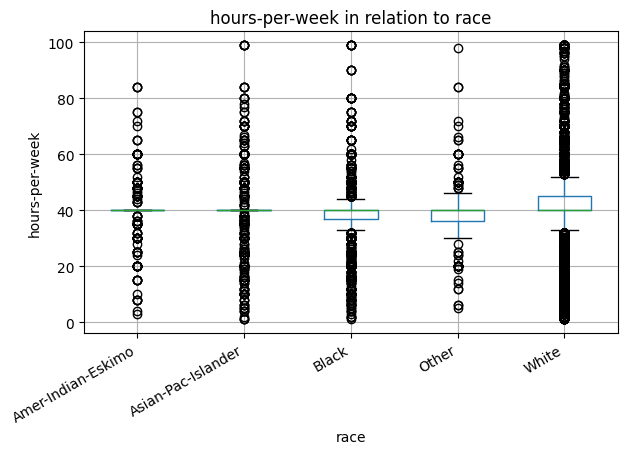

<Figure size 1200x500 with 0 Axes>

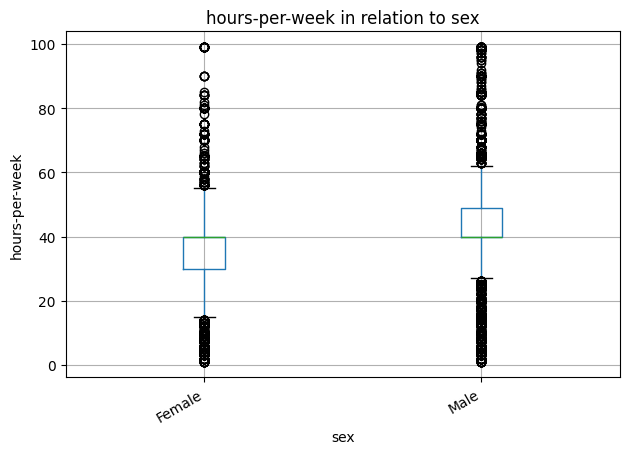

<Figure size 1200x500 with 0 Axes>

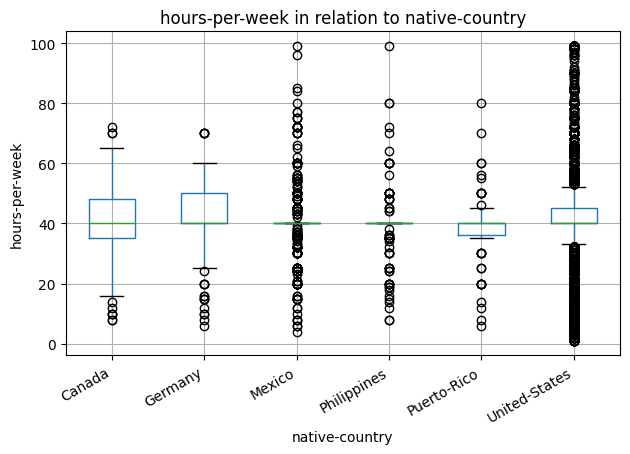

<Figure size 1200x500 with 0 Axes>

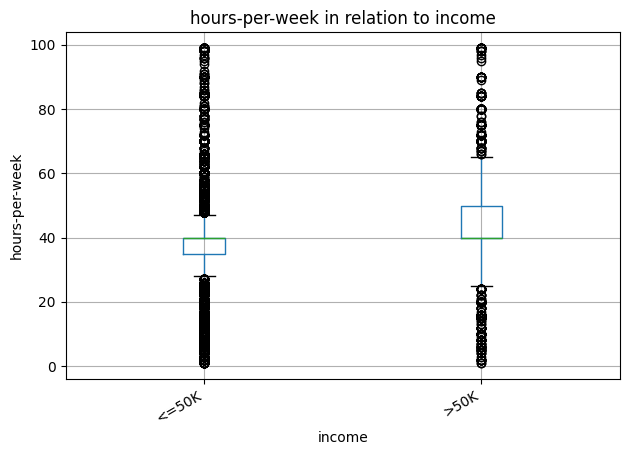

In [21]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()

for col in categorical_cols:
    # Working here with the most relevant variables
    top_cats = df[col].value_counts().head(6).index
    sub = df[df[col].isin(top_cats)]

    plt.figure(figsize=(12,5))
    sub.boxplot(column="hours-per-week", by=col)
    plt.title(f"hours-per-week in relation to {col}")
    plt.suptitle("")
    plt.xlabel(col)
    plt.ylabel("hours-per-week")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

##### 9. Preprocessed data analysis

In [23]:
df_prep = pd.read_csv("D:/Facultate/ADC/Machine Learning/ML_Final_Project/preprocessed_data.csv")

df_prep.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,age_group_prime_early,age_group_prime_late,age_group_young,education_tier_high_edu,education_tier_low_edu,education_tier_mid_edu,occupation_class_blue_or_service,occupation_class_lower_white_collar,occupation_class_upper_white_collar,hours-per-week
0,0.033372,-1.154256,1.169686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,40
1,0.845328,-1.093293,1.169686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13
2,-0.040442,0.298857,-0.458342,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,40
3,1.066770,0.499525,-1.272357,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,40
4,-0.778583,1.590312,1.169686,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40


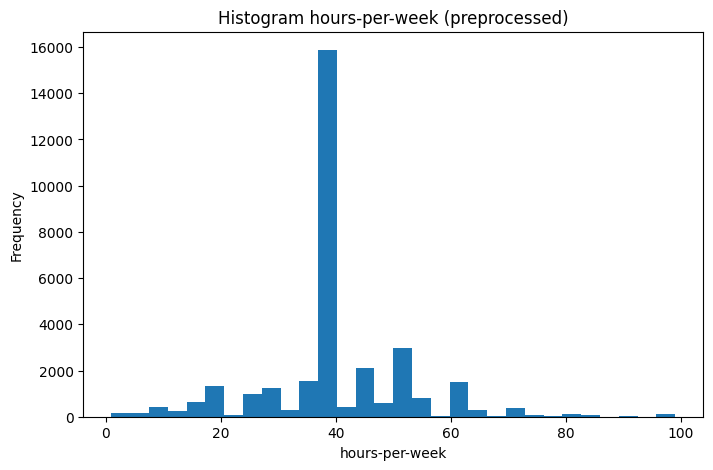

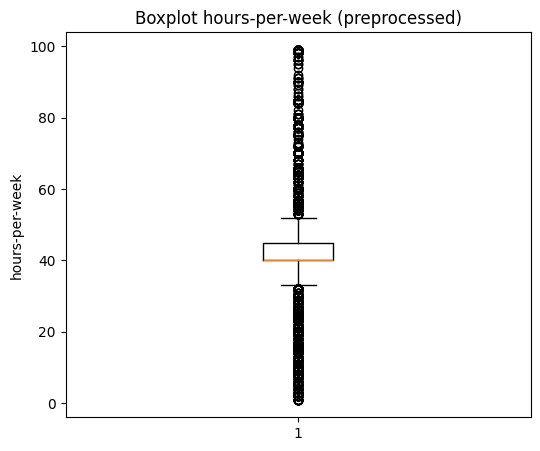

In [24]:
# Hours per week distribution (preprocessed)
hours_p = pd.to_numeric(df_prep["hours-per-week"], errors="coerce")

plt.figure(figsize=(8,5))
plt.hist(hours_p.dropna(), bins=30)
plt.title("Histogram hours-per-week (preprocessed)")
plt.xlabel("hours-per-week")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,5))
plt.boxplot(hours_p.dropna(), showfliers=True)
plt.title("Boxplot hours-per-week (preprocessed)")
plt.ylabel("hours-per-week")
plt.show()

In [25]:
# Descriptives (preprocessed)
numeric_prep = df_prep.select_dtypes(include="number").drop(columns=["hours-per-week"])

desc_prep = pd.DataFrame({
    "mean": numeric_prep.mean(),
    "median": numeric_prep.median(),
    "std": numeric_prep.std()
})

desc_prep


,mean,median,std
age,0.000883,-0.114256,1.000539
fnlwgt,-0.004337,-0.093429,1.000633
education-num,-0.000392,-0.051335,1.001008
capital-gain,0.000000,0.000000,0.000000
capital-loss,0.000000,0.000000,0.000000
...,...,...,...
education_tier_low_edu,0.130559,0.000000,0.336923
education_tier_mid_edu,0.621600,1.000000,0.484996
occupation_class_blue_or_service,0.434828,0.000000,0.495742
occupation_class_lower_white_collar,0.256477,0.000000,0.436695


In [26]:
# Missing values (preprocessed)

df_prep.isna().sum()


age                                    0
fnlwgt                                 0
education-num                          0
capital-gain                           0
capital-loss                           0
                                      ..
education_tier_mid_edu                 0
occupation_class_blue_or_service       0
occupation_class_lower_white_collar    0
occupation_class_upper_white_collar    0
hours-per-week                         0
Length: 117, dtype: int64